# DSO-568: Healthcare Analytics Final Project

## Stroke Prediction Modeling

## Team 5: Campbell Duncan, Jnana K P, Lindsay Yan, Lucian Deng, Marliese Sanabria, Zoha Akhtar

### **Step 1: Import Libraries and Load Data**

#### Import Necessary Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load and Preview the Dataset:

In [2]:
# Load the dataset
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
print("Dataset Shape:", df.shape)

Dataset Shape: (5110, 12)


In [4]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [5]:
df.tail(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5100,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
5101,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
5102,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5103,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


### **Step 2: Exploratory Data Analysis (EDA)**

#### Dataset Information:

In [6]:
# General dataset overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
# Summary Statistics
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


### **Target Variable Analysis:**

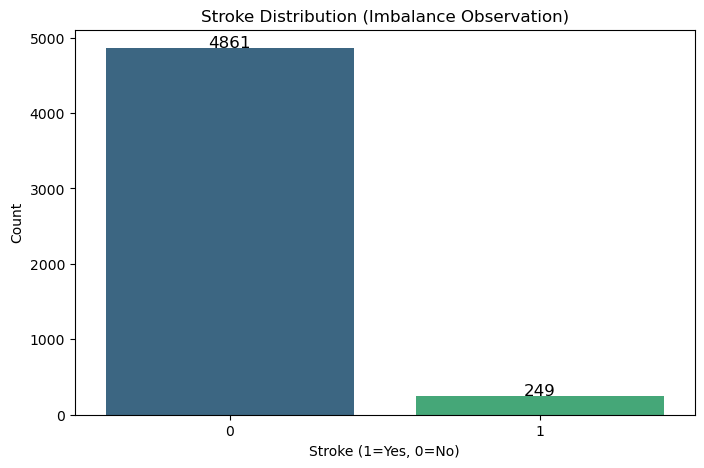

In [9]:
import warnings
warnings.simplefilter("ignore", FutureWarning)
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='stroke', data=df, palette='viridis')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 10, int(p.get_height()), 
            ha='center', fontsize=12)

plt.title('Stroke Distribution (Imbalance Observation)')
plt.xlabel('Stroke (1=Yes, 0=No)')
plt.ylabel('Count')
plt.show()

#### The graph shows a significant class imbalance, with most individuals labeled as "No Stroke" (Class 0) and very few as "Stroke" (Class 1), indicating the need for techniques like SMOTE to address this imbalance during modeling.

### **Univariate Analysis:**

#### Numerical Features:

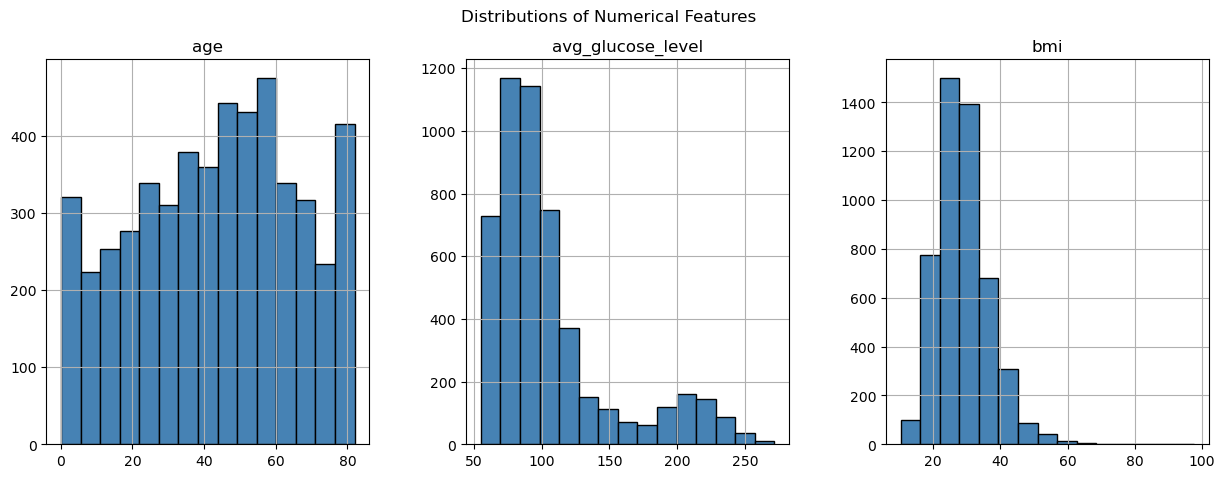

In [10]:
# Histograms for numerical features
numerical_features = ['age', 'avg_glucose_level', 'bmi']
df[numerical_features].hist(bins=15, figsize=(15, 5), layout=(1, 3), color='steelblue', edgecolor='black')
plt.suptitle('Distributions of Numerical Features')
plt.show()

#### The graphs show that the age distribution is fairly uniform across all age groups, the average glucose level is right-skewed with most values concentrated below 150, and the BMI is also right-skewed, with most individuals having a BMI between 20 and 40.

#### Categorical Features:

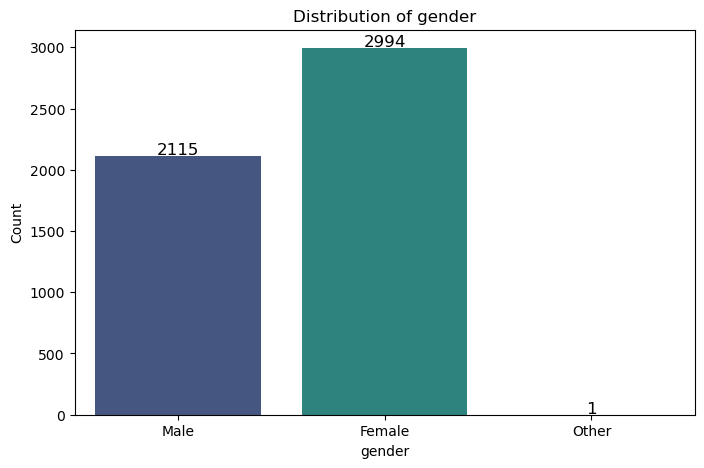

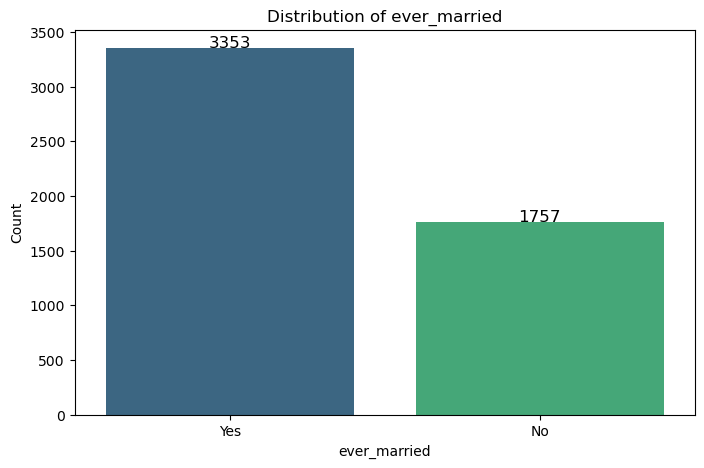

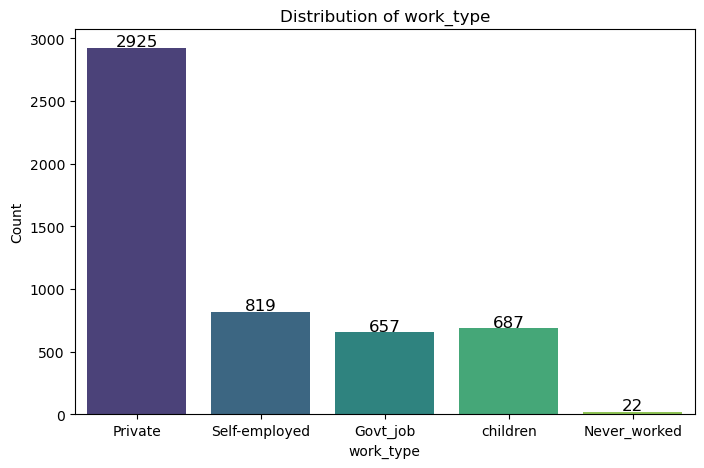

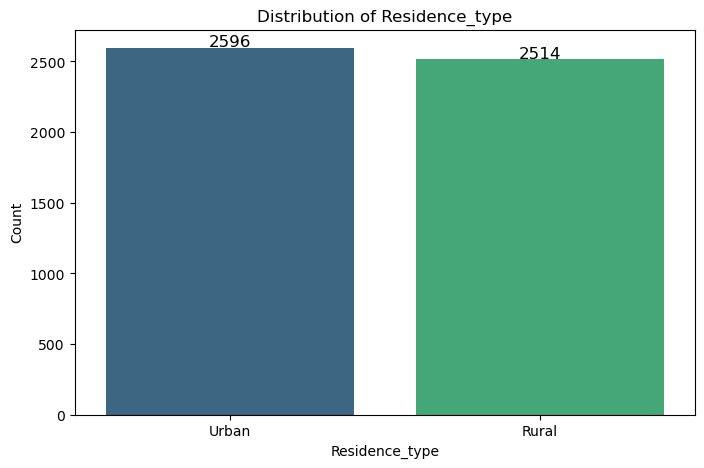

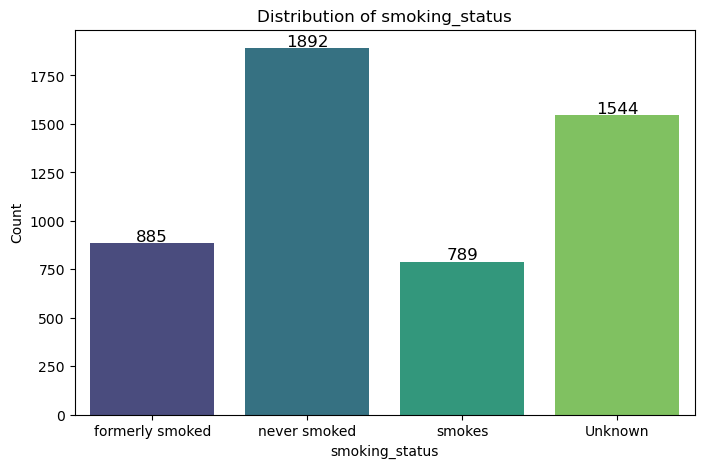

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(data=df, x=feature, palette='viridis')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=0)  
    
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 10, int(p.get_height()),
                ha='center', fontsize=12)
    
    plt.show()

#### Observations:
#### Gender Distribution: The dataset has more females than males, and there are very few instances of 'Other' gender.
#### Ever Married Distribution: The majority of individuals in the dataset have been married.
#### Work Type Distribution: Most individuals are employed in the private sector, followed by self-employed, government jobs, and children. Very few have never worked.
#### Residence Type Distribution: The distribution between urban and rural residence types is almost equal.
#### Smoking Status Distribution: A significant portion of individuals never smoked, followed by those with unknown smoking status. Former smokers and current smokers make up a smaller fraction of the dataset.

### **Bivariate Analysis:**

#### Pairplot for Relationships:

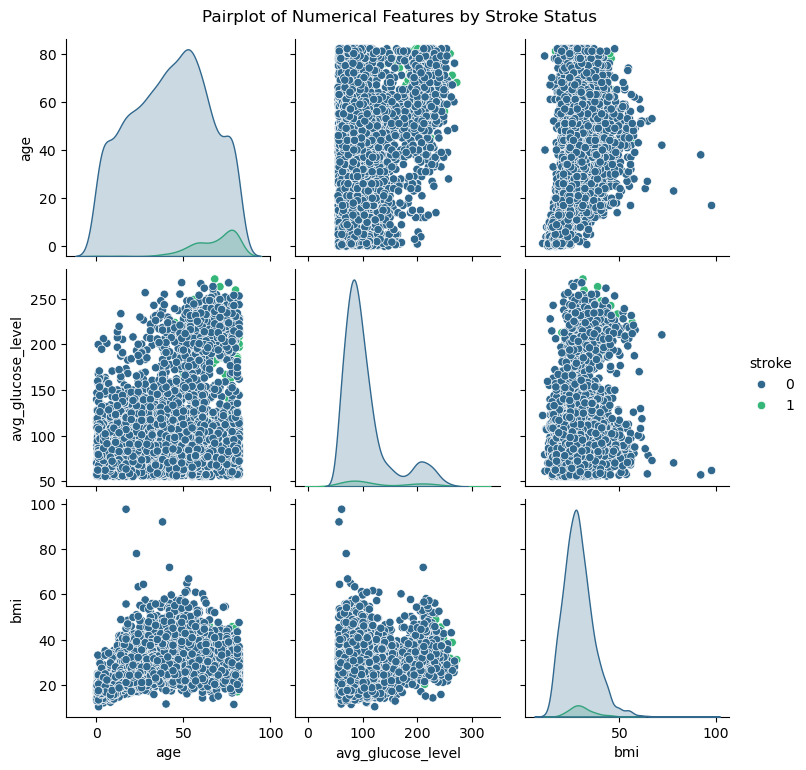

In [12]:
# Pairplot for relationships between numerical features
sns.pairplot(df, vars=numerical_features, hue='stroke', diag_kind='kde', palette='viridis')
plt.suptitle('Pairplot of Numerical Features by Stroke Status', y=1.02)
plt.show()

#### The pairplot reveals that older individuals are more likely to experience strokes, highlighting age as a significant factor. Higher average glucose levels also show a notable association with stroke occurrences. While BMI does not display a strong pattern, stroke cases are scattered across various BMI levels. Overall, the relationships between numerical features indicate that age and average glucose levels are more distinct in separating stroke cases from non-stroke cases compared to BMI.

#### KDE Plots:

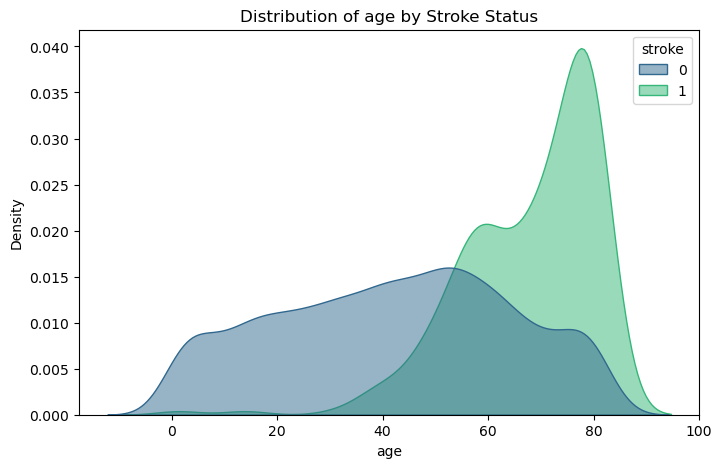

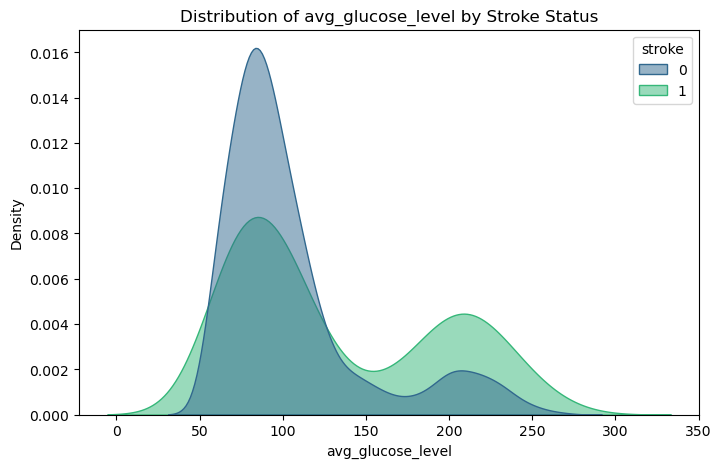

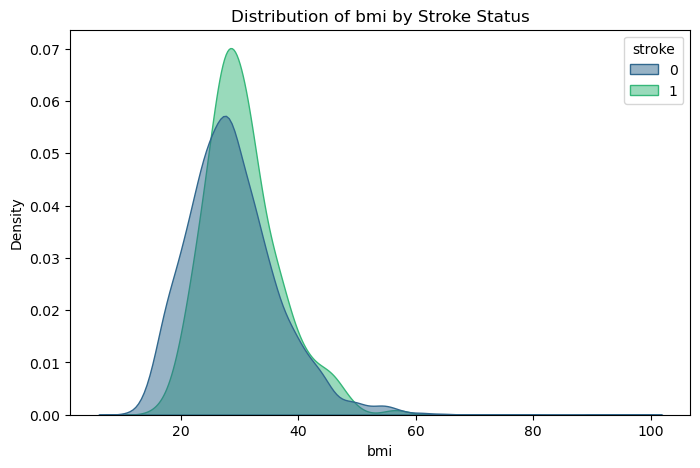

In [13]:
# KDE plots for numerical features split by stroke status
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(data=df, x=feature, hue='stroke', fill=True, common_norm=False, palette='viridis', alpha=0.5)
    plt.title(f'Distribution of {feature} by Stroke Status')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()

#### The KDE plots reveal distinct patterns in the distributions of numerical features based on stroke status. Older individuals, particularly those aged 70-80, show a higher likelihood of having strokes, as observed in the age distribution. Average glucose levels are notably higher among stroke patients, with a density peak above 150 mg/dL, whereas individuals without strokes generally exhibit lower glucose levels, peaking around 100 mg/dL. The BMI distribution is relatively similar for both groups, with the peak density around 25-30, but stroke patients tend to have slightly higher BMIs on average. These patterns highlight the importance of age, glucose levels, and BMI in understanding stroke risks.

#### Boxplots:

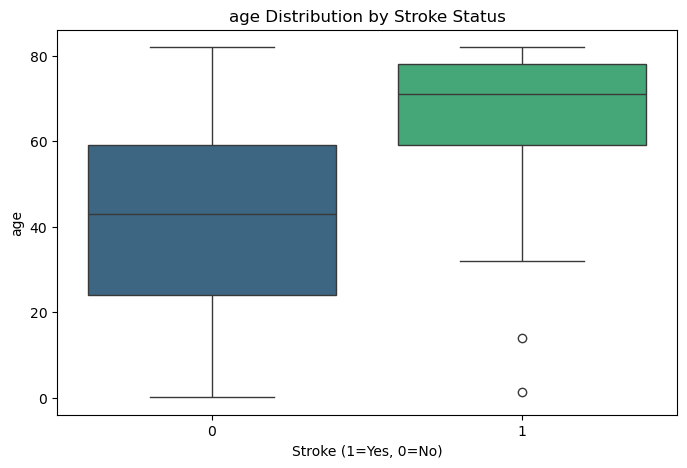

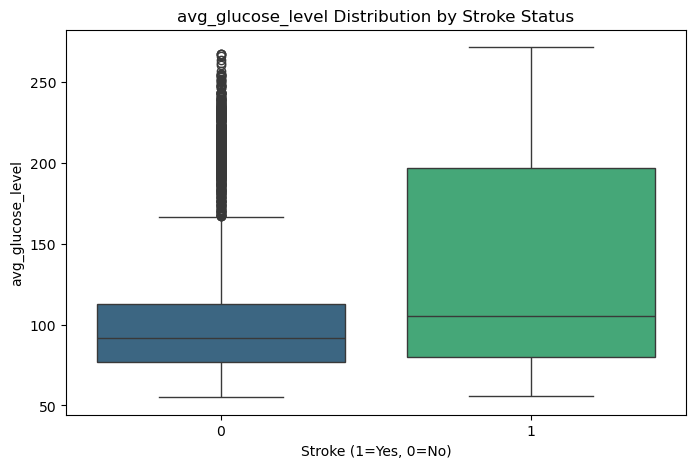

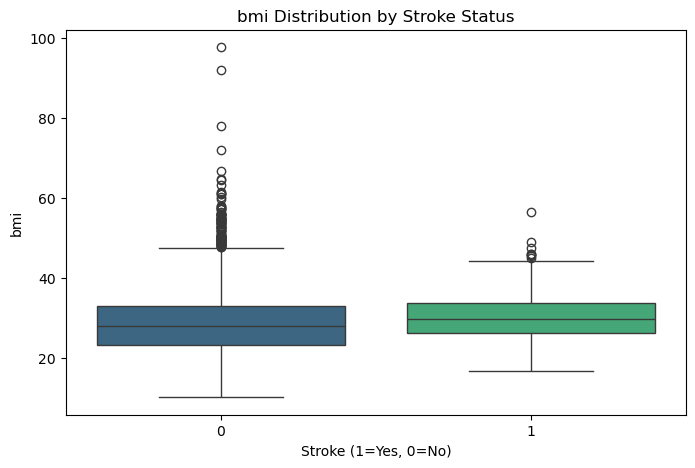

In [14]:
# Boxplots for numerical features by stroke status
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='stroke', y=feature, palette='viridis')
    plt.title(f'{feature} Distribution by Stroke Status')
    plt.xlabel('Stroke (1=Yes, 0=No)')
    plt.ylabel(feature)
    plt.show()

#### The boxplots reveal key distinctions between stroke and non-stroke groups. Age emerges as a significant factor, with stroke patients generally being older and exhibiting a higher median age compared to non-stroke individuals. Similarly, average glucose levels are notably higher among stroke patients, indicating its potential role as a critical risk factor. While BMI distributions appear relatively similar across both groups, with overlapping medians, it suggests that BMI alone may not strongly influence stroke occurrences but could contribute alongside other factors. Overall, age and glucose levels show stronger differentiation between the groups.

#### **Correlation Heatmap (Numeric Features):**

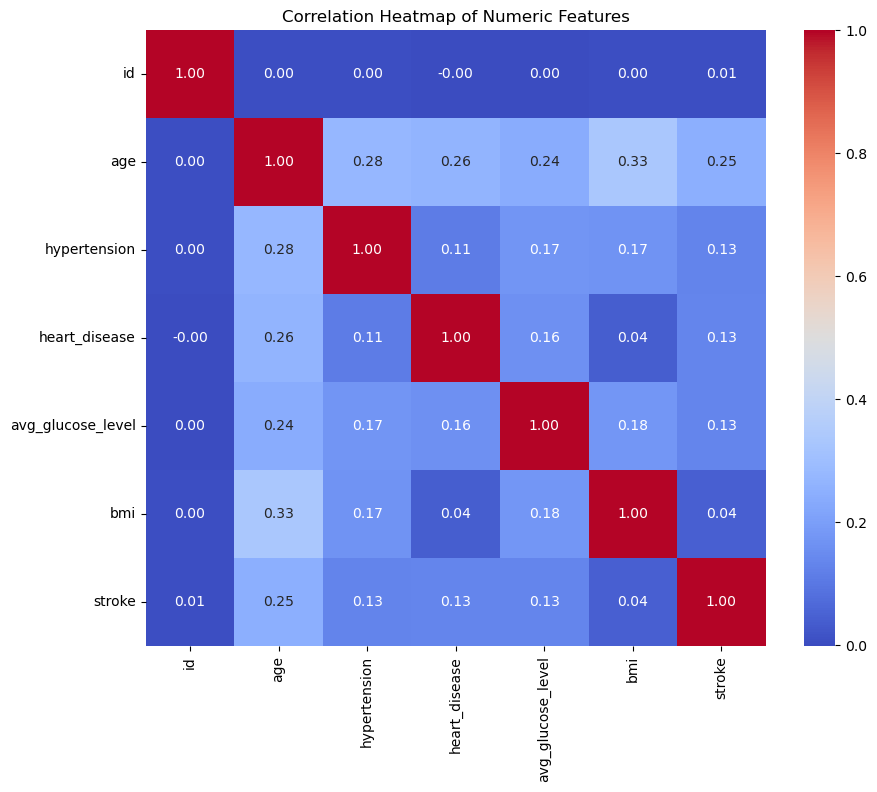

In [15]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

#### The correlation heatmap highlights the relationships among numeric features in the dataset. Age shows a moderate positive correlation with stroke, indicating its relevance as a risk factor. Hypertension, heart disease, and average glucose level exhibit weaker positive correlations with stroke, suggesting their potential combined contribution to stroke prediction. BMI, however, has a negligible correlation with stroke, indicating it may not be a significant predictor in isolation. Additionally, the absence of strong correlations among most features suggests low multicollinearity, which is favorable for predictive modeling.








### **Step 3: Data Cleaning and Feature Encoding**

#### Handle Missing Values:

In [16]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

#### Remove Unnecessary Rows:

In [17]:
df = df[df['gender'] != 'Other']  # Remove rows with 'Other' gender
df = df.drop(columns=["id"])  # Drop ID column

#### Encode Categorical Features:

In [18]:
from sklearn.preprocessing import LabelEncoder

# Label encoding for binary features
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['ever_married'] = label_encoder.fit_transform(df['ever_married'])

# One-Hot Encoding
df = pd.get_dummies(df, columns=['work_type', 'Residence_type', 'smoking_status'], drop_first=True)

#### Correlation Heatmap:

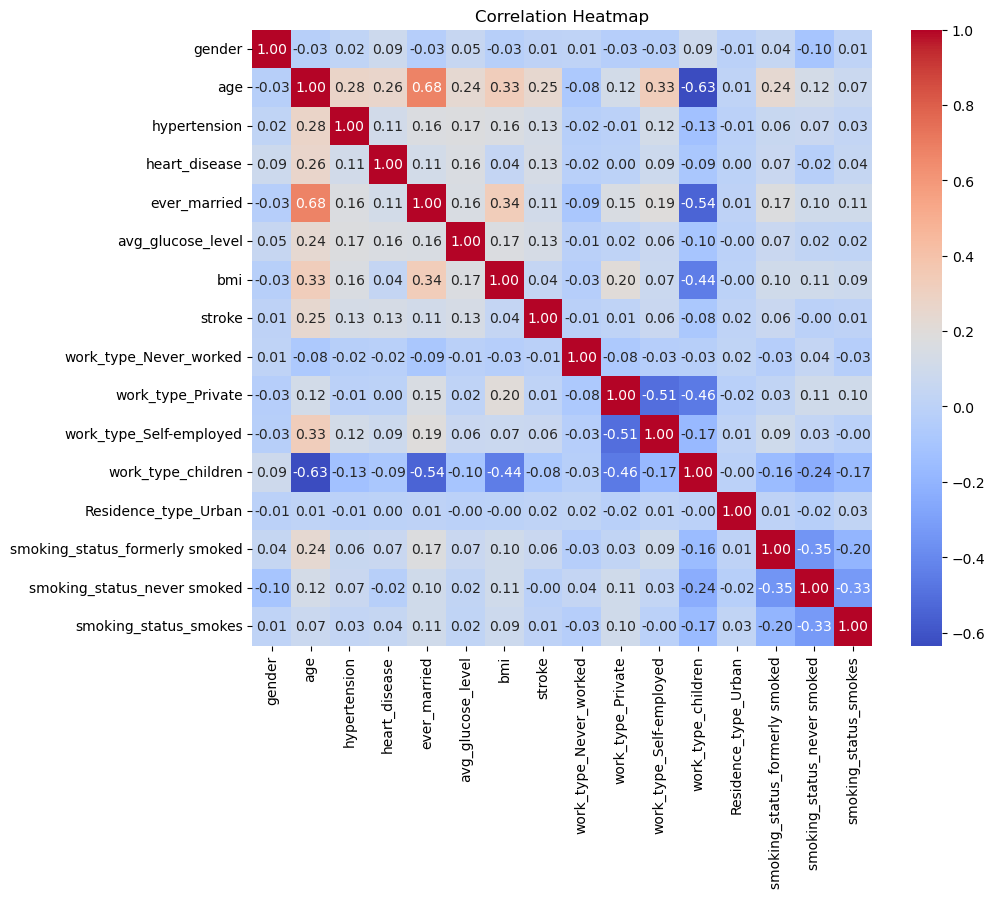

In [19]:
# Compute and visualize correlation
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

#### The correlation heatmaps highlight relationships between numeric and encoded categorical features. Age shows a strong positive correlation with being ever married, indicating older individuals are more likely to have been married. There is a notable negative correlation between the "work type - children" and being married, as expected. Hypertension exhibits a moderate positive correlation with age, suggesting an increased likelihood of hypertension with aging. BMI and stroke show a weak positive correlation, indicating a slight association. Smoking status categories display weak correlations with stroke, with "never smoked" and "formerly smoked" showing slight negative associations. Overall, age and marital status demonstrate the strongest correlations, indicating their potential significance in predicting stroke.

### **Step 4: Feature Selection Using Statsmodels**

#### To determine statistically significant variables:

In [17]:
import statsmodels.api as sm
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning

# Suppress ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

# Define the independent variables (features) and the dependent variable (target)
X = df.drop(columns=['stroke'])  # Exclude 'stroke' from features
y = df['stroke']

# Add a constant for the intercept in the logistic regression model
X = sm.add_constant(X)

# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(y, X).fit(maxiter=10000)

# Display the summary of the model
logit_summary = logit_model.summary()
print(logit_summary)

         Current function value: 0.154742
         Iterations: 10000
                           Logit Regression Results                           
Dep. Variable:                 stroke   No. Observations:                 5109
Model:                          Logit   Df Residuals:                     5093
Method:                           MLE   Df Model:                           15
Date:                Fri, 22 Nov 2024   Pseudo R-squ.:                  0.2056
Time:                        00:46:49   Log-Likelihood:                -790.58
converged:                      False   LL-Null:                       -995.14
Covariance Type:            nonrobust   LLR p-value:                 8.366e-78
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -7.8354      0.606    -12.923      0.000      -9.024      -6.647
ge

#### The logistic regression summary identifies age, avg_glucose_level, and bmi as significant predictors of stroke with p-values below 0.05. Variables like hypertension and heart_disease show potential relevance but lack strong statistical significance. Additionally, extreme coefficients observed for certain categorical variables, such as work_type_Never_worked, may require further investigation.

### **Step 5: Baseline Logistic Regression Model**

#### Model Training and Evaluation:

Model Accuracy: 0.9511
ROC-AUC Score: 0.8404

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.00      0.00      0.00        75

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533


Confusion Matrix:
[[1458    0]
 [  75    0]]


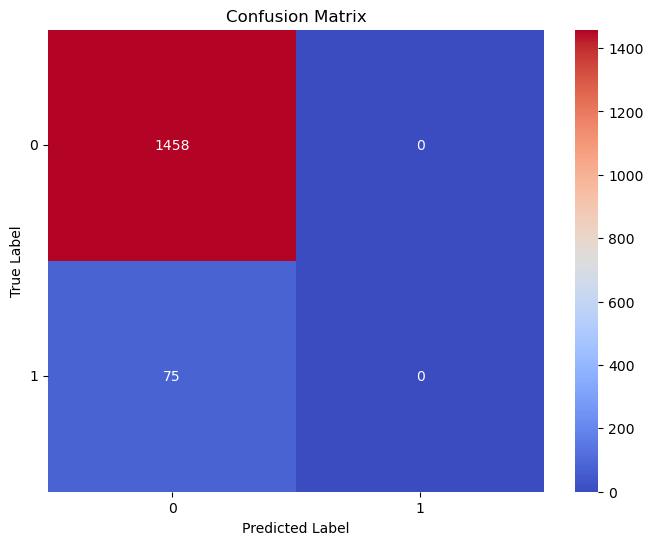

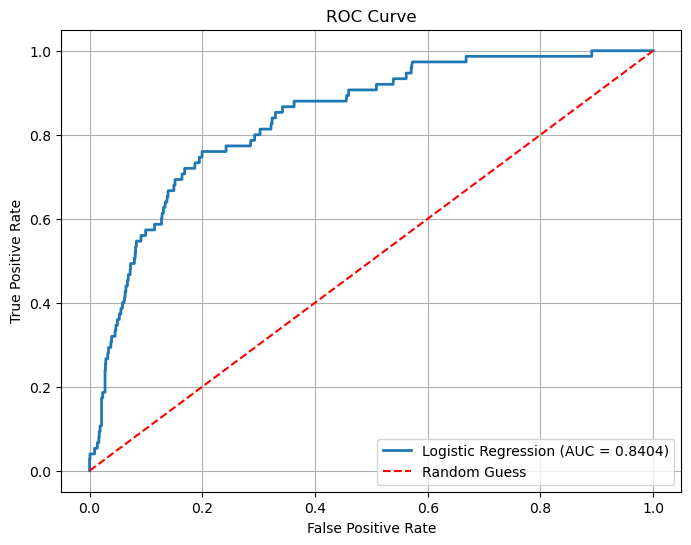

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.simplefilter("ignore", category=UndefinedMetricWarning)

# Select significant features
X_sig = X[["age", "hypertension", "avg_glucose_level"]]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sig, y, test_size=0.3, random_state=42, stratify=y)

# Initialize and train the logistic regression model
logistic_model = LogisticRegression(max_iter=10000, random_state=42)
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test)
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Print evaluation results
print(f"Model Accuracy: {accuracy:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_rep)
print("\nConfusion Matrix:")
print(confusion_mat)

# Display the confusion matrix 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='coolwarm', cbar=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.yticks(rotation=0)
plt.show()

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.4f})", linewidth=2)
plt.plot([0, 1], [0, 1], 'r--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

#### The model is biased towards predicting the majority class (No Stroke) due to class imbalance. It fails to predict any strokes (Class 1), resulting in zero recall and precision for this class. Addressing class imbalance using SMOTE

### **Step 6: Addressing Class Imbalance with SMOTE**

#### Resample the Dataset:

Model Accuracy: 0.7802
ROC-AUC Score: 0.8550

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.74      0.77      1458
           1       0.76      0.82      0.79      1458

    accuracy                           0.78      2916
   macro avg       0.78      0.78      0.78      2916
weighted avg       0.78      0.78      0.78      2916


Confusion Matrix:
[[1082  376]
 [ 265 1193]]


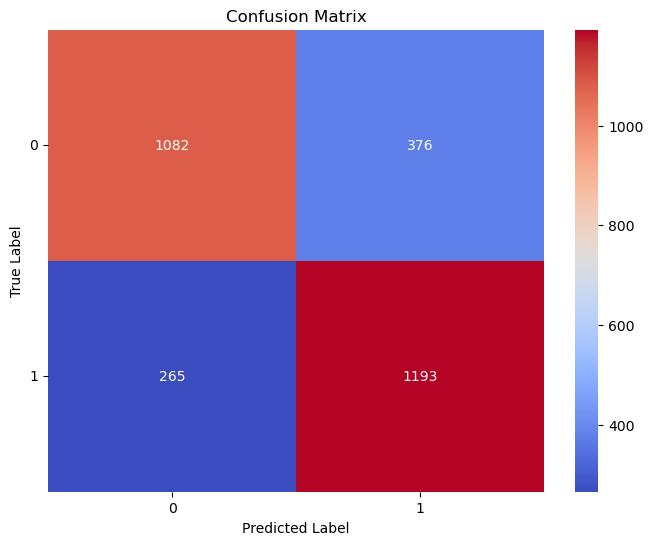

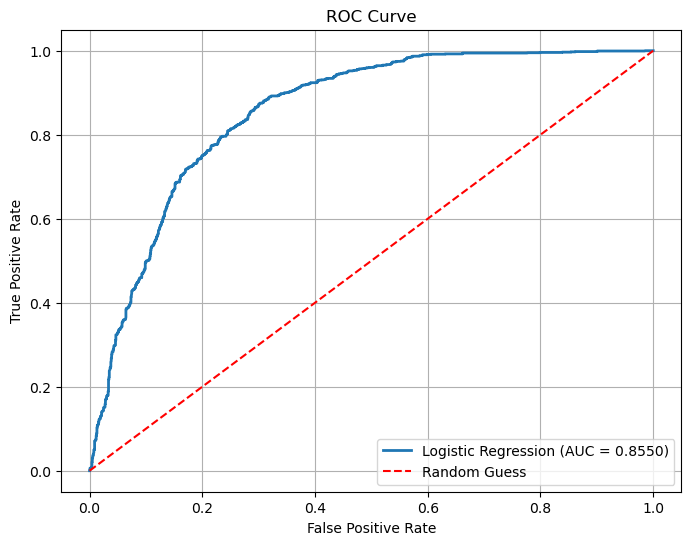

In [116]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Apply SMOTE to balance the classes in the training data with significant features only
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_sig, y)

# Splitting the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

# Train the logistic regression model on the resampled data
model_resampled = LogisticRegression(max_iter=1000000, random_state=42)
model_resampled.fit(X_train, y_train)

# Make predictions on the test data
y_pred_resampled = model_resampled.predict(X_test)
y_pred_resampled_proba = model_resampled.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Evaluate the model after addressing class imbalance
accuracy_resampled = accuracy_score(y_test, y_pred_resampled)
roc_auc_resampled = roc_auc_score(y_test, y_pred_resampled_proba)
classification_report_resampled = classification_report(y_test, y_pred_resampled)
confusion_matrix_resampled = confusion_matrix(y_test, y_pred_resampled)

# Print evaluation results
print(f"Model Accuracy: {accuracy_resampled:.4f}")
print(f"ROC-AUC Score: {roc_auc_resampled:.4f}")
print("\nClassification Report:")
print(classification_report_resampled)
print("\nConfusion Matrix:")
print(confusion_matrix_resampled)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_resampled, annot=True, fmt='d', cmap='coolwarm', cbar=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.yticks(rotation=0)  
plt.show()

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_resampled_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc_resampled:.4f})", linewidth=2)
plt.plot([0, 1], [0, 1], 'r--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

### Overall accuracy went down but recall score of class 1 improved significantly. Now testing the model with all features

In [20]:
# Using Smote, the resampled data is now balanced
y_resampled.value_counts()

stroke
1    4860
0    4860
Name: count, dtype: int64

Model Accuracy: 0.8642
ROC-AUC Score: 0.9414

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1458
           1       0.85      0.88      0.87      1458

    accuracy                           0.86      2916
   macro avg       0.86      0.86      0.86      2916
weighted avg       0.86      0.86      0.86      2916


Confusion Matrix:
[[1241  217]
 [ 179 1279]]


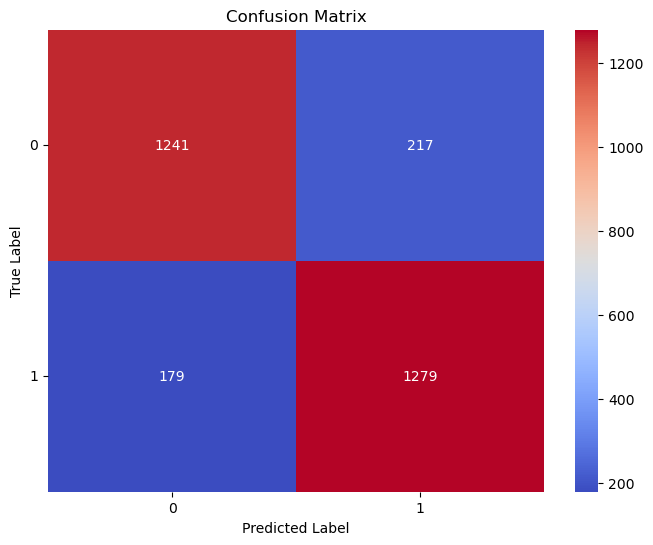

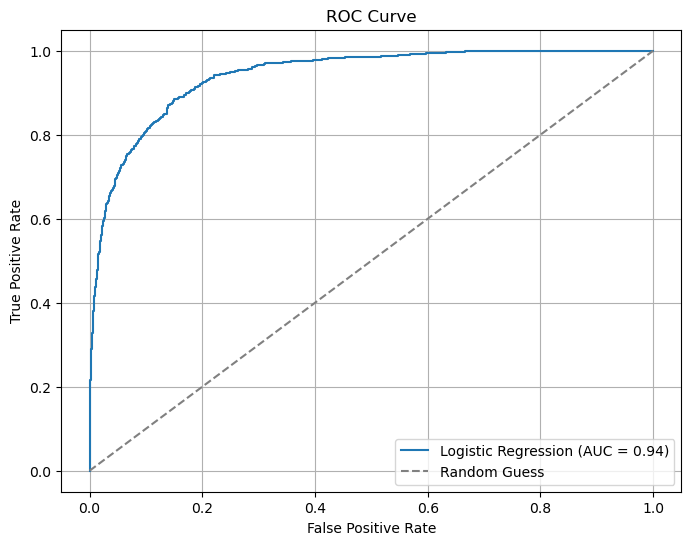

In [117]:
import os
import warnings
from sklearn.exceptions import UndefinedMetricWarning
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress sklearn-specific warnings
warnings.simplefilter("ignore", category=UndefinedMetricWarning)

# Suppress OpenMP runtime warnings
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"  # Avoid OpenMP warnings

# Resampling the entire dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
)

# Initialize and train the logistic regression model
logistic_model = LogisticRegression(max_iter=10000, random_state=42)
logistic_model.fit(X_train, y_train)

# Make predictions and predict probabilities
y_pred = logistic_model.predict(X_test)
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print evaluation results
print(f"Model Accuracy: {accuracy:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_rep)
print("\nConfusion Matrix:")
print(confusion_mat)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='coolwarm', cbar=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.yticks(rotation=0)
plt.show()

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

#### Accuracy improved by approx 8% using all the features. Class 1 recall score improved by 6% as well. For machine learning purposes and improving patient outcomes, all features will be included in future model explorations.

### **Step 7: Advanced Machine Learning Models**

### **Decision Tree:**





Model Accuracy: 0.9201
ROC-AUC Score: 0.9207

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.92      1458
           1       0.90      0.95      0.92      1458

    accuracy                           0.92      2916
   macro avg       0.92      0.92      0.92      2916
weighted avg       0.92      0.92      0.92      2916


Confusion Matrix:
[[1304  154]
 [  79 1379]]


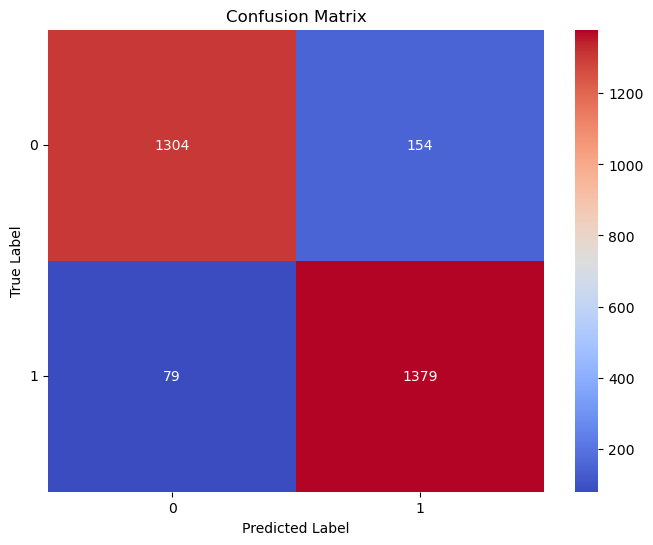

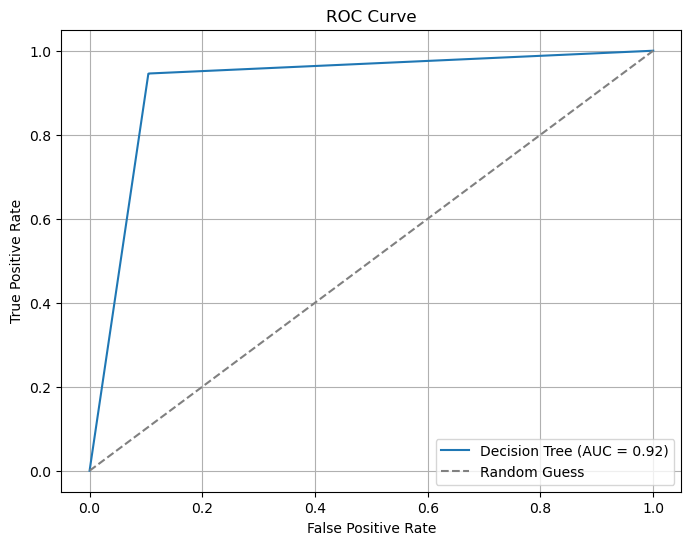

In [118]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train a decision tree classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Make predictions and predict probabilities
y_pred_tree = decision_tree_model.predict(X_test)
y_pred_tree_proba = decision_tree_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
classification_rep_tree = classification_report(y_test, y_pred_tree, zero_division=0)
confusion_mat_tree = confusion_matrix(y_test, y_pred_tree)
roc_auc_tree = roc_auc_score(y_test, y_pred_tree_proba)

# Print evaluation results
print(f"Model Accuracy: {accuracy_tree:.4f}")
print(f"ROC-AUC Score: {roc_auc_tree:.4f}")
print("\nClassification Report:")
print(classification_rep_tree)
print("\nConfusion Matrix:")
print(confusion_mat_tree)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_tree, annot=True, fmt='d', cmap='coolwarm', cbar=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.yticks(rotation=0)
plt.show()

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_tree_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {roc_auc_tree:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

#### The Decision Tree model achieved an accuracy of 92.1% and an ROC-AUC score of 92.07%. It performs well in identifying stroke cases with balanced precision and recall, though the simplicity of the tree structure might lead to moderate interpretability. The confusion matrix indicates relatively fewer misclassifications, with false positives slightly higher than false negatives.



###  **Random Forest:**


Model Accuracy: 0.9513
ROC-AUC Score: 0.9894

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1458
           1       0.94      0.96      0.95      1458

    accuracy                           0.95      2916
   macro avg       0.95      0.95      0.95      2916
weighted avg       0.95      0.95      0.95      2916


Confusion Matrix:
[[1373   85]
 [  57 1401]]


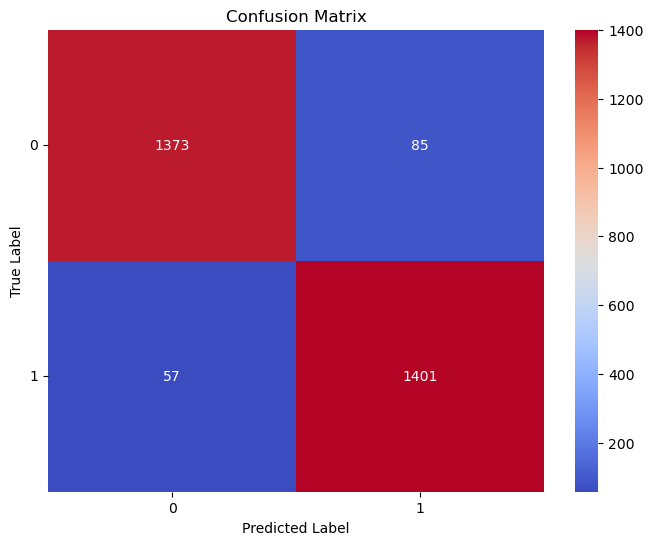

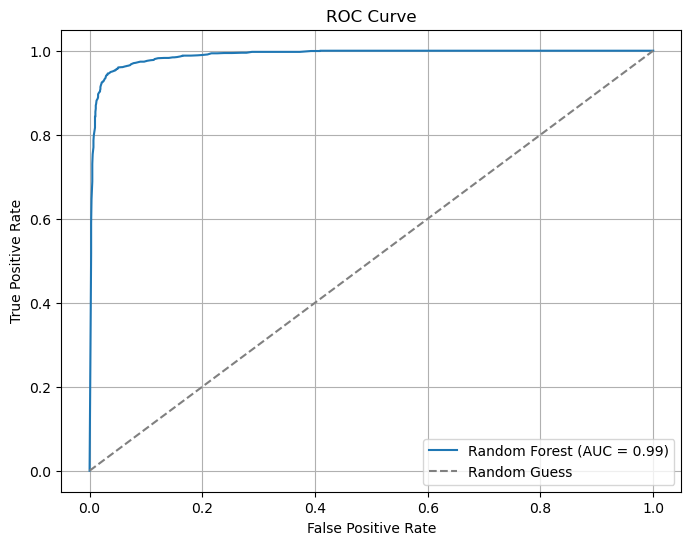

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train a Random Forest classifier
random_forest_model = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')
random_forest_model.fit(X_train, y_train)

# Make predictions and predict probabilities
y_pred_rf = random_forest_model.predict(X_test)
y_pred_rf_proba = random_forest_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf, zero_division=0)
confusion_mat_rf = confusion_matrix(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf_proba)

# Print evaluation results
print(f"Model Accuracy: {accuracy_rf:.4f}")
print(f"ROC-AUC Score: {roc_auc_rf:.4f}")
print("\nClassification Report:")
print(classification_rep_rf)
print("\nConfusion Matrix:")
print(confusion_mat_rf)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_rf, annot=True, fmt='d', cmap='coolwarm', cbar=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.yticks(rotation=0)
plt.show()

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

#### The Random Forest model significantly improves performance, with an accuracy of 95.1% and an ROC-AUC score of 98.94%. This model captures more complex relationships within the data, leading to enhanced predictive power. The classification report reflects balanced precision and recall for both classes, making it a robust choice for prediction.

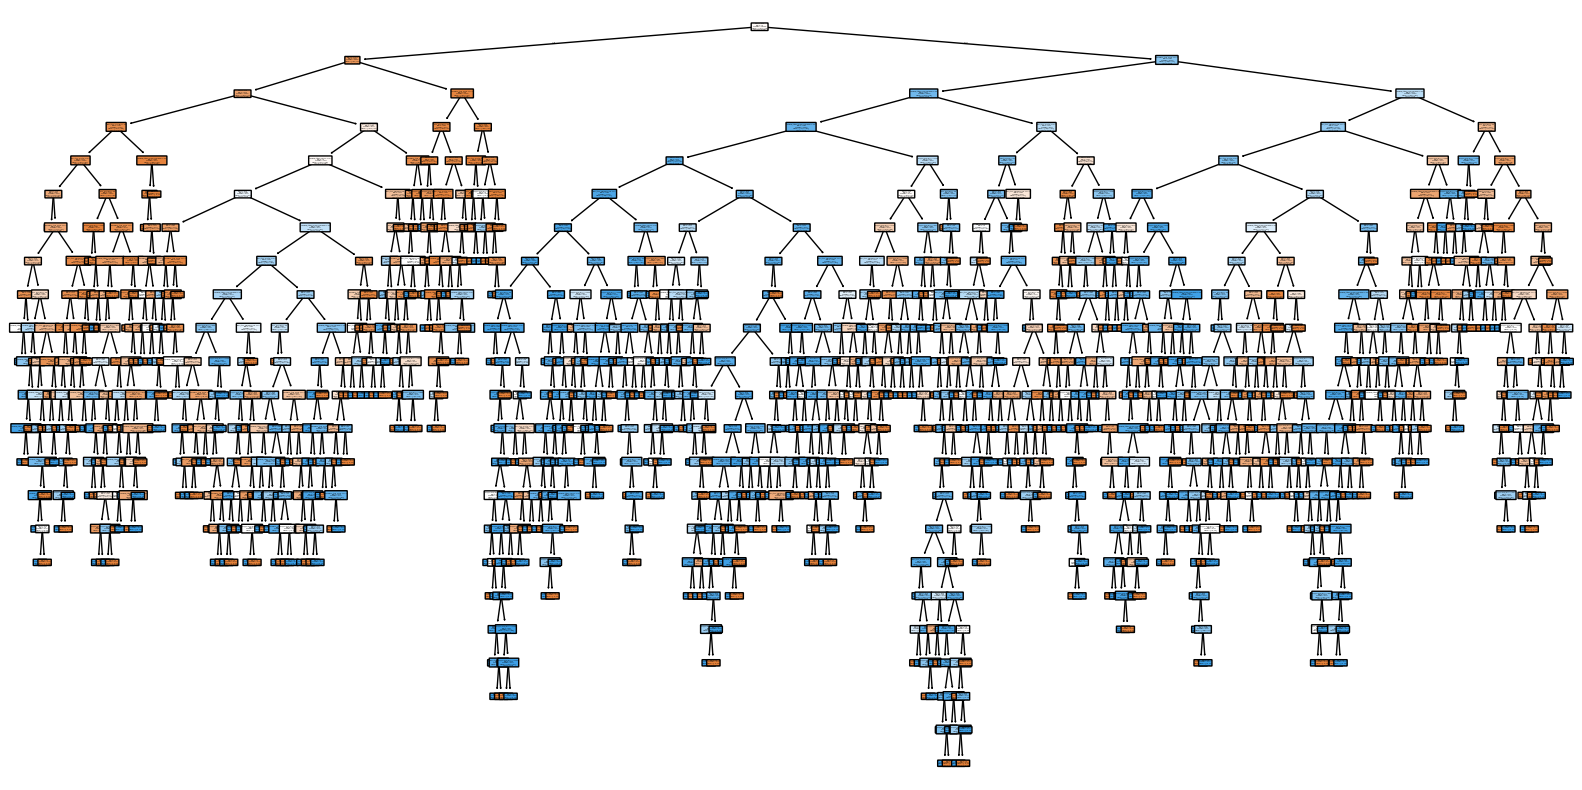

In [24]:
# Visualization of a single tree in the random forest
estimator = random_forest_model.estimators_[0]

plt.figure(figsize=(20, 10))
tree.plot_tree(
    estimator,
    filled=True,
    feature_names=X_train.columns,  
    class_names=['No Stroke', 'Stroke'],  
    rounded=True,
    proportion=True,
)
plt.show()

### **XGBoost:**


Model Accuracy: 0.9534
ROC-AUC Score: 0.9867

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1458
           1       0.94      0.97      0.95      1458

    accuracy                           0.95      2916
   macro avg       0.95      0.95      0.95      2916
weighted avg       0.95      0.95      0.95      2916


Confusion Matrix:
[[1366   92]
 [  44 1414]]


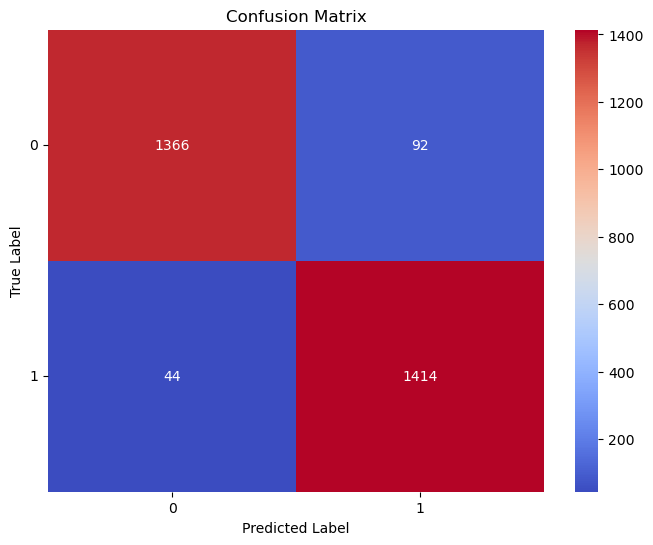

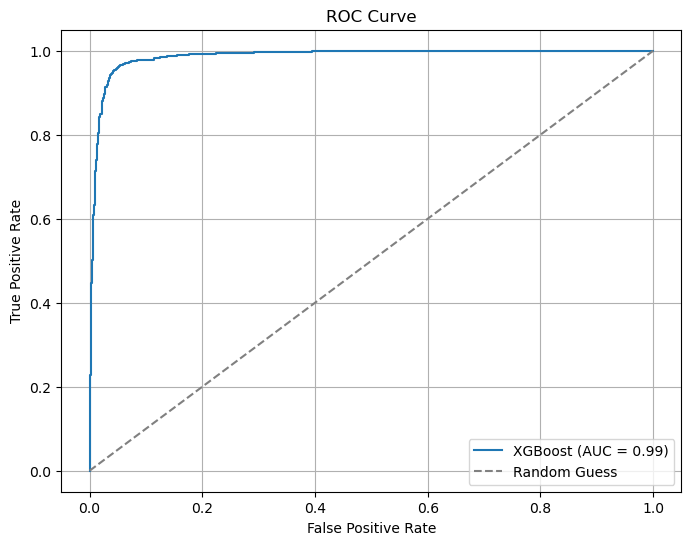

In [120]:
import os
import gc
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Clear memory
gc.collect()

# Limit threads
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

# Initialize and train an XGBoost classifier
xgboost_model = xgb.XGBClassifier(random_state=42, scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))
xgboost_model.fit(X_train, y_train)

# Make predictions and predict probabilities
y_pred_xgb = xgboost_model.predict(X_test)
y_pred_xgb_proba = xgboost_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb, zero_division=0)
confusion_mat_xgb = confusion_matrix(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb_proba)

# Print results
print(f"Model Accuracy: {accuracy_xgb:.4f}")
print(f"ROC-AUC Score: {roc_auc_xgb:.4f}")
print("\nClassification Report:")
print(classification_rep_xgb)
print("\nConfusion Matrix:")
print(confusion_mat_xgb)

# Confusion matrix visualization
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_xgb, annot=True, fmt='d', cmap='coolwarm', cbar=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.yticks(rotation=0)
plt.show()

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {roc_auc_xgb:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

#### The XGBoost model delivered an accuracy of 95.3% and an ROC-AUC score of 98.67%. Its high performance demonstrates its ability to handle imbalanced data effectively, leveraging advanced boosting techniques. The classification report confirms excellent recall and precision for stroke cases, with the ROC curve indicating minimal false positive rates.

### **Ensemble Method (Random Forest with XGBOOST):**

Model Accuracy: 0.9547
Model ROC-AUC Score: 0.9904

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1458
           1       0.94      0.97      0.96      1458

    accuracy                           0.95      2916
   macro avg       0.96      0.95      0.95      2916
weighted avg       0.96      0.95      0.95      2916


Confusion Matrix:
[[1374   84]
 [  48 1410]]


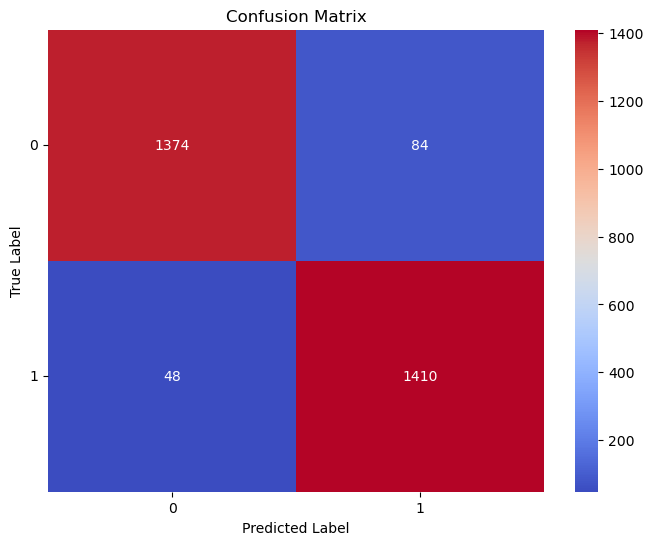

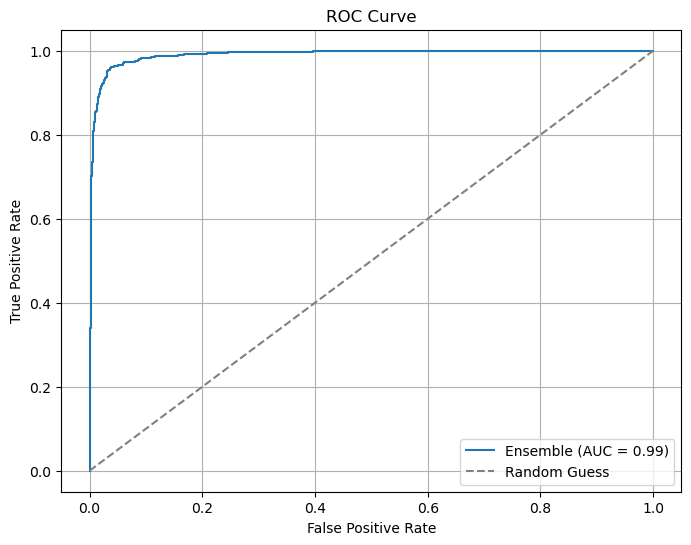

In [121]:
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix, roc_curve
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the ensemble model
ensemble_model = VotingClassifier(
    estimators=[('rf', random_forest_model), ('xgb', xgboost_model)], 
    voting='soft'
)

# Train the ensemble model on the resampled data
ensemble_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb_ensemble = ensemble_model.predict(X_test)
y_pred_xgb_ensemble_proba = ensemble_model.predict_proba(X_test)[:, 1]

# Evaluate the ensemble model
accuracy_xgb_ensemble = accuracy_score(y_test, y_pred_xgb_ensemble)
roc_auc_xgb_ensemble = roc_auc_score(y_test, y_pred_xgb_ensemble_proba)
classification_report_xgb_ensemble = classification_report(y_test, y_pred_xgb_ensemble)
confusion_matrix_xgb_ensemble = confusion_matrix(y_test, y_pred_xgb_ensemble)

# Print evaluation results
print(f"Model Accuracy: {accuracy_xgb_ensemble:.4f}")
print(f"Model ROC-AUC Score: {roc_auc_xgb_ensemble:.4f}\n")
print("Classification Report:\n")
print(classification_report_xgb_ensemble)
print("\nConfusion Matrix:")
print(confusion_matrix_xgb_ensemble)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_xgb_ensemble, annot=True, fmt='d', cmap='coolwarm', cbar=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.yticks(rotation=0)
plt.show()

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb_ensemble_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Ensemble (AUC = {roc_auc_xgb_ensemble:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

#### The ensemble method combining Random Forest and XGBoost outperformed individual models, achieving the highest accuracy of 95.47% and an ROC-AUC score of 99.04%. By integrating the strengths of both models, this approach ensures a balance between accuracy and generalizability. The confusion matrix reflects minimal misclassifications, and the ROC curve confirms outstanding performance.

### **Step 8: Model Performance Comparison and Visualization**

In [113]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize a list to store performance metrics for each model
model_results = []

# Example: Logistic Regression (Replace with actual predictions)
lr_accuracy = accuracy_score(y_test, y_pred)
lr_precision = precision_score(y_test, y_pred, average="binary", zero_division=0)
lr_recall = recall_score(y_test, y_pred, average="binary", zero_division=0)
lr_f1 = f1_score(y_test, y_pred, average="binary", zero_division=0)
lr_roc_auc = roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])

model_results.append(["Logistic Regression", lr_accuracy, lr_precision, lr_recall, lr_f1, lr_roc_auc])

# Example: Decision Tree
dt_accuracy = accuracy_score(y_test, y_pred_tree)
dt_precision = precision_score(y_test, y_pred_tree, average="binary", zero_division=0)
dt_recall = recall_score(y_test, y_pred_tree, average="binary", zero_division=0)
dt_f1 = f1_score(y_test, y_pred_tree, average="binary", zero_division=0)
dt_roc_auc = roc_auc_score(y_test, decision_tree_model.predict_proba(X_test)[:, 1])

model_results.append(["Decision Tree", dt_accuracy, dt_precision, dt_recall, dt_f1, dt_roc_auc])

# Example: Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average="binary", zero_division=0)
rf_recall = recall_score(y_test, y_pred_rf, average="binary", zero_division=0)
rf_f1 = f1_score(y_test, y_pred_rf, average="binary", zero_division=0)
rf_roc_auc = roc_auc_score(y_test, random_forest_model.predict_proba(X_test)[:, 1])

model_results.append(["Random Forest", rf_accuracy, rf_precision, rf_recall, rf_f1, rf_roc_auc])

# Example: XGBoost
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_precision = precision_score(y_test, y_pred_xgb, average="binary", zero_division=0)
xgb_recall = recall_score(y_test, y_pred_xgb, average="binary", zero_division=0)
xgb_f1 = f1_score(y_test, y_pred_xgb, average="binary", zero_division=0)
xgb_roc_auc = roc_auc_score(y_test, xgboost_model.predict_proba(X_test)[:, 1])

model_results.append(["XGBoost", xgb_accuracy, xgb_precision, xgb_recall, xgb_f1, xgb_roc_auc])

# Example: Ensemble (Random Forest + XGBoost)
ensemble_accuracy = accuracy_score(y_test, y_pred_xgb_ensemble)
ensemble_precision = precision_score(y_test, y_pred_xgb_ensemble, average="binary", zero_division=0)
ensemble_recall = recall_score(y_test, y_pred_xgb_ensemble, average="binary", zero_division=0)
ensemble_f1 = f1_score(y_test, y_pred_xgb_ensemble, average="binary", zero_division=0)
ensemble_roc_auc = roc_auc_score(y_test, y_pred_xgb_ensemble_proba)

model_results.append(["Ensemble (RF + XGBoost)", ensemble_accuracy, ensemble_precision, ensemble_recall, ensemble_f1, ensemble_roc_auc])

# Create a DataFrame to display the results
df_comparison = pd.DataFrame(model_results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"])

# Display the comparison table
df_comparison

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.864198,0.854947,0.877229,0.865944,0.941436
1,Decision Tree,0.920096,0.899543,0.945816,0.922100,0.920690
2,Random Forest,0.951303,0.942799,0.960905,0.951766,0.989362
3,XGBoost,0.953361,0.938911,0.969822,0.954116,0.986707
4,Ensemble (RF + XGBoost),0.954733,0.943775,0.967078,0.955285,0.990374


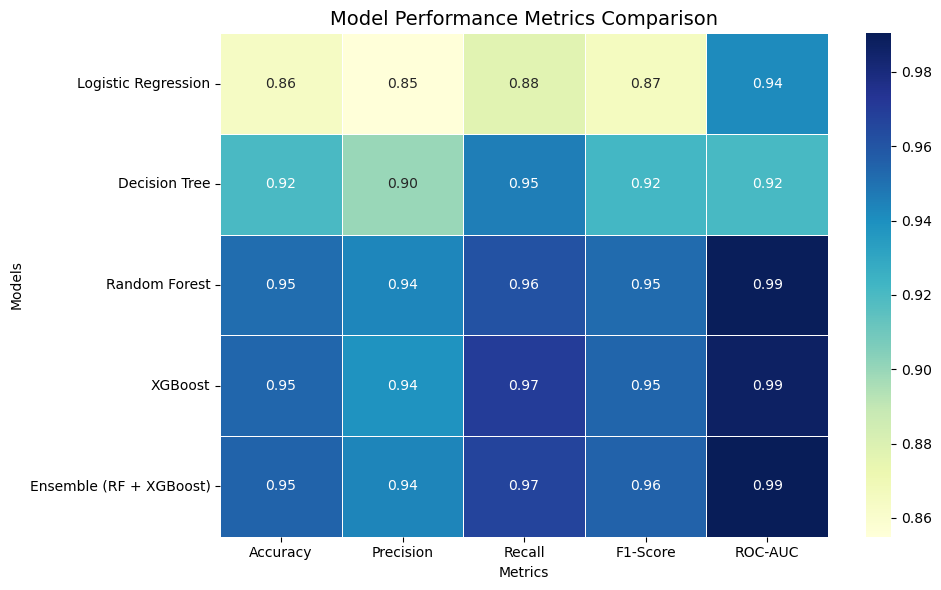

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data for the heatmap
comparison_data = df_comparison.set_index("Model")

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(comparison_data, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("Model Performance Metrics Comparison", fontsize=14)
plt.ylabel("Models")
plt.xlabel("Metrics")
plt.tight_layout()
plt.show()

#### The final results indicate that the ensemble model combining Random Forest and XGBoost performs the best among all models. It achieves the highest accuracy (95.47%), precision (94%), recall (97%), F1-Score (96%), and ROC-AUC score (99.04%). This demonstrates its superior ability to balance precision and recall while achieving robust classification performance. The ensemble approach outperforms standalone models such as Logistic Regression, Decision Tree, Random Forest, and XGBoost, making it the most suitable model for this stroke prediction task.